In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
dt = pd.read_csv(r'C:\Users\REBIRTH JEREMYELEVEN\Desktop\3.01.+Country+clusters.csv')

In [3]:
dt.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [6]:
x = dt.drop(['Country', 'Language'], axis=1)
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
kmeans = KMeans(3)


In [18]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
cluster = kmeans.fit_predict(x)


In [20]:
new_dt = dt.copy()
new_dt['Cluster'] = cluster


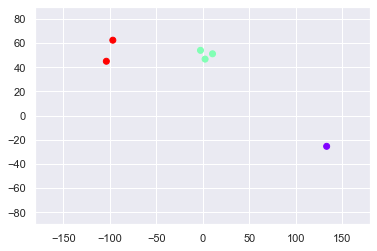

In [9]:
plt.scatter(new_dt['Longitude'], new_dt['Latitude'], c=new_dt['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [24]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_v = kmeans.inertia_
    wcss.append(wcss_v)

In [25]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

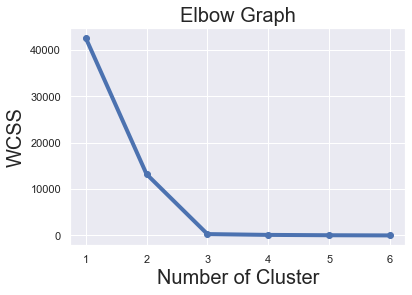

In [29]:
no_of_clusters = range(1,7)

plt.plot(no_of_clusters, wcss, lw=4, marker='o')
plt.title("Elbow Graph", size=20)
plt.xlabel('Number of Cluster', size=20)
plt.ylabel('WCSS', size=20)

plt.show()